**Part 1. Numpy [7 points]**

In this part you must not use loops (for, while) and map function. For every implemented function provide some usage example (you may use randomly sampled matrices). Pay attention to types of input variables

In [1]:
import numpy as np

**Task 1. [0.5 point]** Implement a function that takes two matrices as input, flattens them and returns a one-dimensional array where elements of these matrices alternate.

For example, (np.array([[1,2,3], [4,5,6]]), np.array([[7,8],[9,10]])) -> [1,7,2,8,3,9,4,10,5,6].

In [ ]:
def flatten_merge(arr_a, arr_b):
    if isinstance(arr_a, np.ndarray) and isinstance(arr_b, np.ndarray):
        remainder = None
        result = None
        if len(arr_a.flatten()) > len(arr_b.flatten()):
            remainder = arr_a.flatten()[len(arr_b.flatten()):len(arr_a.flatten())]
            result = np.stack((arr_a.flatten()[:len(arr_b.flatten())], arr_b.flatten()), axis=1)
            result = np.concatenate((result.flatten(), remainder))
        else:
            remainder = arr_b.flatten()[len(arr_a.flatten()):len(arr_b.flatten())]
            result = np.stack((arr_a.flatten(), arr_b.flatten()[:len(arr_a.flatten())]), axis=1)
            result = np.concatenate((result.flatten(), remainder))
        return result
    else:
        return None

In [ ]:
r = flatten_merge(np.array([[10,11], [12, 13]]), np.array([[1,2,3], [4,5,6], [7, 8, 9]]))
print(r)

[10  1 11  2 12  3 13  4  5  6  7  8  9]


**Task 2. [0.5 point]** 
Implement a function to calculate the product of non-zero elements of array. For example, for np.array([1,2,0,6]) the answer is 12.
If there are no non-zero elements, the function must return nan.

In [ ]:
def product_non_zero(arr):
    if isinstance(arr, np.ndarray):
        if np.count_nonzero(arr) == 0: #len(arr.flatten())
            return None
        else:
            arr[arr == 0] = 1
            return np.prod(arr)
    else:
        return None

In [ ]:
r = product_non_zero(np.array([1,2,0,6]))
print(r)

12


**Task 3. [1 point]**
Normalize every column of the input matrix: subtract the mean and divide by the std (avoid division by zero)

In [1]:
def vertical_scale(arr):
    if isinstance(arr, np.ndarray):
        mean = arr.mean(axis=0)
        std = arr.std(axis=0)
        std[std == 0] = 1 #could be in try... except, but since the standard deviation is zero, then the values of the constant column (are the same)
        return (arr - mean) / std
    else:
        return None

In [6]:
r = vertical_scale(np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]]))
print(r)

[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]


**Task 4. [0.5 points]**
Implement a function that returns transposed matrix, without changing given.

In [ ]:
def safe_transpose(arr):
    if isinstance(arr, np.ndarray):
        return arr.T #As I understand it, not to change the original means not to assign the transposed matrix to the same variable
    else:
        return None

In [ ]:
a = safe_transpose(np.array([[1, 2, 3], [1, 5, 6], [1, 8, 9]]))
print(a)

[[1 1 1]
 [2 5 8]
 [3 6 9]]


**Task 5. [0.5]**
Implement a funtion that returns index of max element in the matrix.

In [7]:
#First version
def max_elem_index(arr):
    if isinstance(arr, np.ndarray):
        return np.argmax(arr)
    else:
        return None

In [8]:
a = max_elem_index(np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]]))
print(a)

11


In [ ]:
#Second version, return tuple of indexes
def max_elem_index(arr):
    if isinstance(arr, np.ndarray):
        return np.unravel_index(np.argmax(arr, axis=None), arr.shape)
    else:
        return None

In [ ]:
a = max_elem_index(np.array([[1, 2, 3], [1, 5, 6], [1, 8, 9]]))
print(a)

(2, 2)


**Task 6. [1 points]**
Implement a function that will take a matrix and insert a zeros between every column and row.

Example: [[1, 2], [3, 4]] -> [[1, 0, 2], [0, 0, 0], [3, 0, 4]]

In [ ]:
def insert_zeros(arr):
    if isinstance(arr, np.ndarray):
        arr = np.dstack((arr, np.zeros_like(arr))).reshape(arr.shape[0], -1)
        arr = arr.T
        arr = np.dstack((arr, np.zeros_like(arr))).reshape(arr.shape[0], -1)
        arr = arr.T
        arr = arr[0:-1, 0:-1]
        return arr
    else:
        return None

In [ ]:
a = insert_zeros(np.array([[1, 2, 3], [1, 5, 6], [1, 8, 9]]))
print(a)

[[1 0 2 0 3]
 [0 0 0 0 0]
 [1 0 5 0 6]
 [0 0 0 0 0]
 [1 0 8 0 9]]


**Task 7. [0.5 points]**
Implement a function that returns those columns of matrix that have count of elements greater than k is greater than count of elements smaller than k.

For example, ([[1,2],[3,4]], 2) -> [[2], [4]].

In [ ]:
def k_columns(arr, k):
    if isinstance(arr, np.ndarray):
        c_max = (arr > k).sum(0)
        c_min = (arr < k).sum(0)
        index = np.where(c_max > c_min)[0]
        arr = arr[:, index]
        return arr
    else:
        return None

In [ ]:
a = k_columns(np.array([[1, 2, 9], [1, 15, 6], [1, 8, 11]]), 8)
print(a)

[[ 9]
 [ 6]
 [11]]


**Task 8. [0.5 points]**
Implement a function that an integer matrix and an integer as input. It multiplies each element of the matrix by minimal factor that this element becomes divisible by the given number.

For example, ([[5, 4, 36, 8]], 12) -> [[60, 12, 36, 24]].

In [ ]:
def make_divisible(arr, k):
    if isinstance(arr, np.ndarray) and isinstance(k, int):
        return np.lcm(arr, k)
    else:
        return None

In [ ]:
a = make_divisible(np.array([[5, 4, 36, 8]]), 12)
a

array([[60, 12, 36, 24]])

**Task 9. [0.5 points]**
Given a matrix, implement a function that transforms all elements greater than a_max into a_max. And all elements that are smaller that a_min into a_min.

In [ ]:
def min_max_crop(arr, a_min, a_max):
    if isinstance(arr, np.ndarray):
        arr[arr < a_min] = a_min
        arr[arr > a_max] = a_max
        return arr
    else:
        return None

In [ ]:
a = min_max_crop(np.array([[1, 2, 3], [1, 5, 6], [1, 8, 9]]), 3, 6)
a

array([[3, 3, 3],
       [3, 5, 6],
       [3, 6, 6]])

**Task 10. [0.5 points]**
 Implement a function that replaces nan elements with the mean of all non-nan elements. In case if all elements are nan the function does nothing.

In [ ]:
def replace_nans(arr):
    if isinstance(arr, np.ndarray):
        if len(arr[np.isnan(arr)].flatten()) == len(arr.flatten()):
            return arr
        else:
            arr[np.isnan(arr)] = np.nanmean(arr)
            return arr
    else:
        return None

In [ ]:
a = replace_nans(np.array([[4, np.NaN], [np.NaN, np.NaN]]))
a

array([[4., 4.],
       [4., 4.]])

**Task 11. [0.5 points]**
Implement a function that calculates:



*   determinant
*   trace
*   eigenvalues
*   Frobenius norm
*   inverse matrix

of a matrix given



In [ ]:
def matrix_stats(arr):
    if isinstance(arr, np.ndarray):
        determinant = np.linalg.det(arr)
        trace = arr.trace()
        eigenvalues, _ = np.linalg.eig(arr)
        frobenius_norm = np.linalg.norm(arr, 'fro')

        try:
            inverse = np.linalg.inv(arr)
        except BaseException:
            inverse = None
        
        return determinant, trace, eigenvalues, frobenius_norm, inverse
    else:
        return None

In [ ]:
determinant, trace, eigenvalues, frobenius_norm, inverse = matrix_stats(np.array([[1, 2, 3], [1, 5, 6], [1, 8, 11]]))
print(determinant)
print(trace)
print(eigenvalues)
print(frobenius_norm)
print(inverse)

6.0
17
[15.89104669+0.j          0.55447666+0.26481453j  0.55447666-0.26481453j]
16.186414056238647
[[ 1.16666667  0.33333333 -0.5       ]
 [-0.83333333  1.33333333 -0.5       ]
 [ 0.5        -1.          0.5       ]]


**Task 12. [0.5 points]**
Implement a function that takes two lists of same length N, constructs a N by 3 matrix. First two columns are the elements of input lists and values in the third column are the result of bitwise xor of elements of the same row.

In [ ]:
def construct_xor_matrix(list_a, list_b):
    if isinstance(list_a, list) and isinstance(list_b, list):
        c = np.zeros((len(list_a), 3), dtype=int)
        c[:, 2] = np.bitwise_xor(list_a, list_b)
        c[:, 0] = np.array(list_a)
        c[:, 1] = np.array(list_b)
        return c
    else:
        return None

In [ ]:
a = [1, 3, 5, 7]
b = [2, 4, 6, 8]
c = construct_xor_matrix(a, b)
c

array([[ 1,  2,  3],
       [ 3,  4,  7],
       [ 5,  6,  3],
       [ 7,  8, 15]])

### **Part 2. Dataset analysis [8 points]**

In this part we are going to analyze the "Titanic dataset". The main goal of this task is to describe the data.

Here are some tips:



*   use plots
*   notice pecualrities in the data
*   present verbal explanations, don't be too shy

**Important** Please pay attention to your plots: titles, axis-labels and legends are necessary.

These tasks involve numpy, pandas and matplotlib - very common python modules. In one task you may use scipy.

**Input data**

This task uses 2 files:

*   passengers_record.csv contains some general information on passengers (name, class, age, etc.)
*   survival_info.csv contains binary labels whether passenger survived or not



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Task 1. [1 point]**

Read these files and join them into single dataset (use passenger_id as join key). Then provide some description of the dataset:

*    What are age/gender/class distributions and their averages? How many people belong to each group?
*    Find the oldest/youngest passangers in every class

*    Compare survival rates between classes/age groups/genders (configuration of age groups is up to you)

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
#read dataframe from html
passengers_record = pd.read_html("/gdrive/My Drive/dataset/msu/passengers_record.csv")
passengers_record = passengers_record[0]

survival_info = pd.read_html("/gdrive/My Drive/dataset/msu/survival_info.csv")
survival_info = survival_info[0]

if passengers_record.shape == (891, 12) and survival_info.shape == (891, 3):
    print("Setup Complete!")

Setup Complete!


In [ ]:
passengers_record.head()

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,NaN,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,NaN,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,NaN,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,NaN,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
survival_info.head()

,Unnamed: 0,PassengerId,Survived
0,NaN,1,0
1,NaN,2,1
2,NaN,3,1
3,NaN,4,1
4,NaN,5,0


In [ ]:
main_df = pd.merge(passengers_record, survival_info, left_on=['PassengerId'], right_on=['PassengerId'], how='inner')
main_df.head()

,Unnamed: 0_x,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 0_y,Survived
0,NaN,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,0
1,NaN,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,1
2,NaN,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1
3,NaN,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,1
4,NaN,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,0


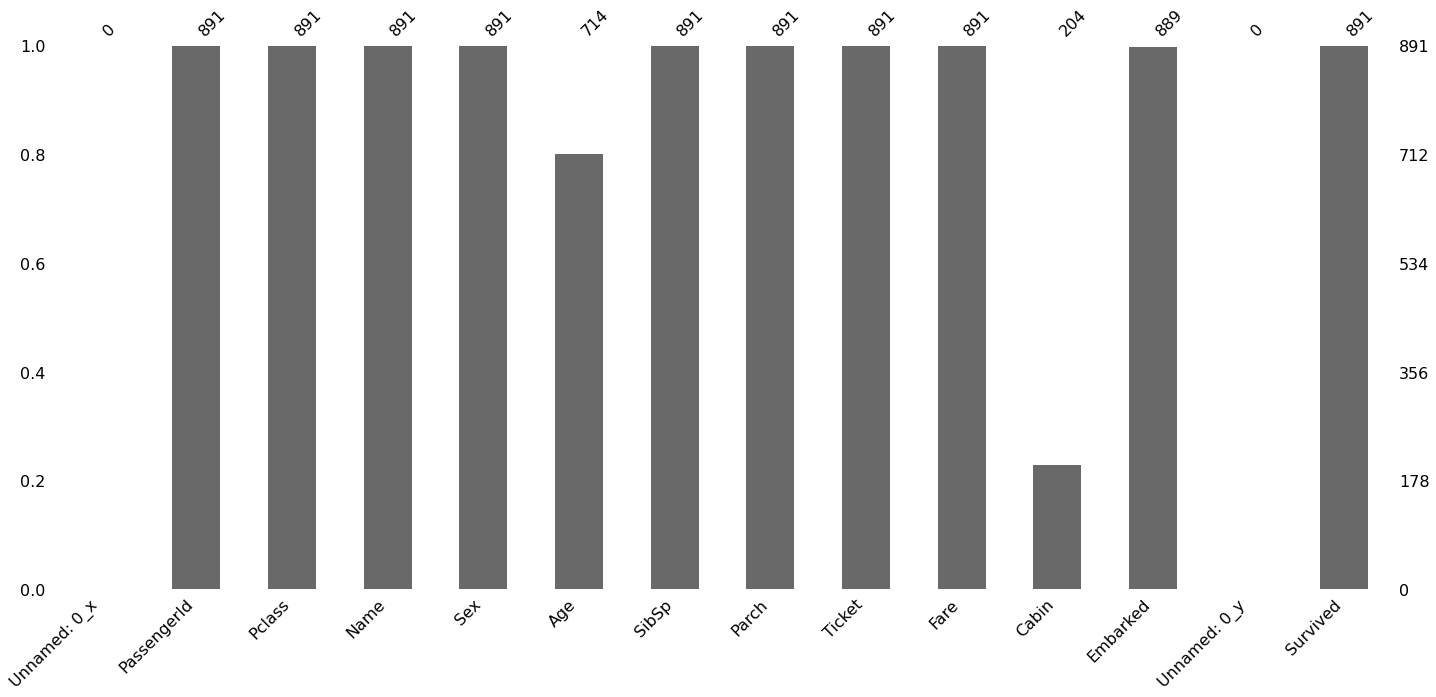

In [ ]:
import missingno as msno
#Visualizing missing values in a dataframe main_df
msno.bar(main_df)

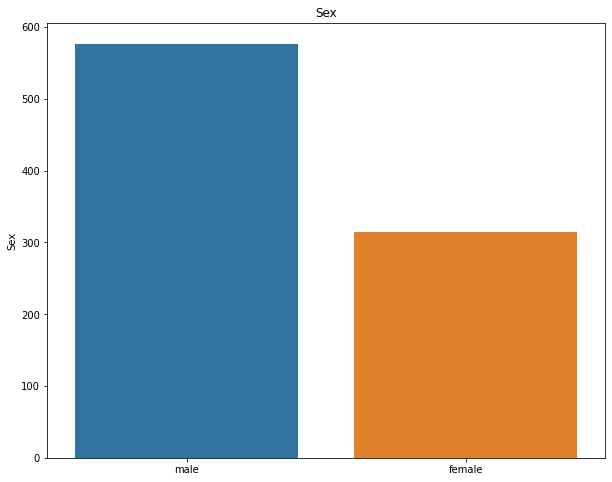

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Sex")
sns.barplot(x=main_df['Sex'].value_counts().index, y=main_df['Sex'].value_counts())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


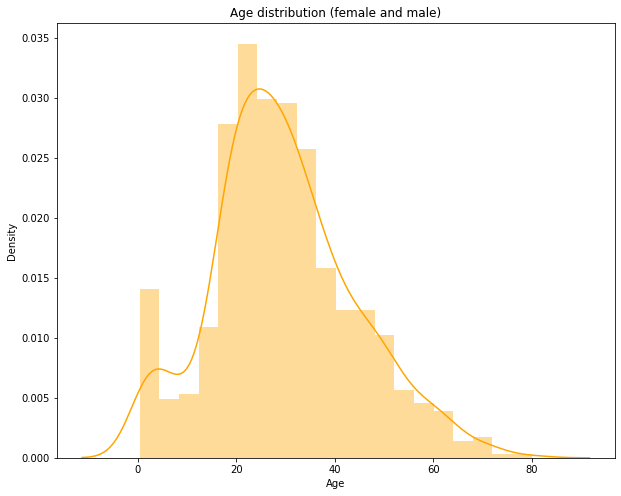

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Age distribution (female and male)")
sns.distplot(main_df['Age'], color="orange")

In [ ]:
main_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


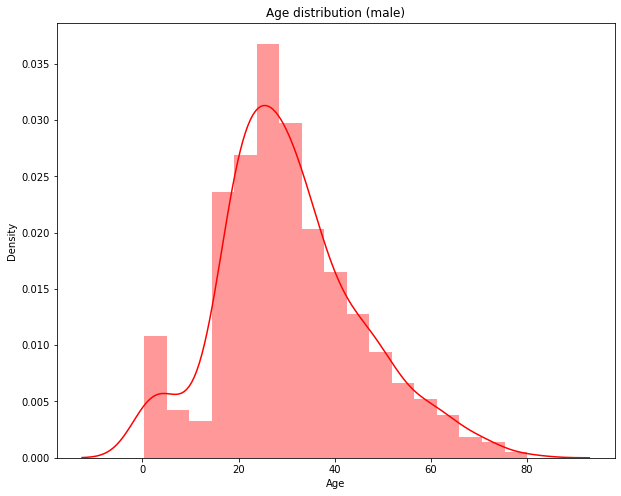

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Age distribution (male)")
sns.distplot(main_df[main_df['Sex'] == 'male']['Age'], color="red")

In [ ]:
main_df[main_df['Sex'] == 'male']['Age'].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


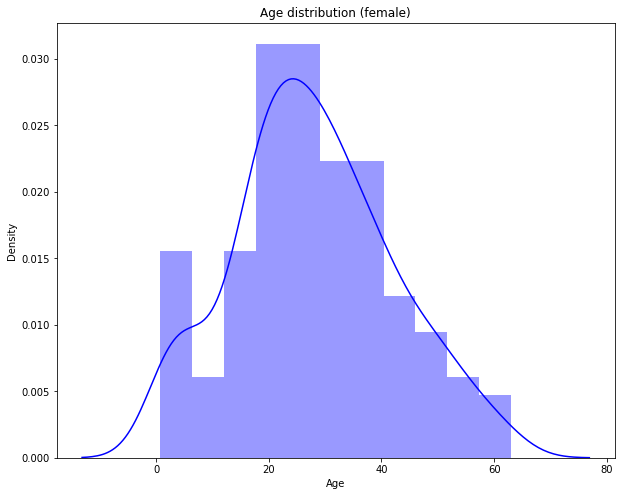

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Age distribution (female)")
sns.distplot(main_df[main_df['Sex'] == 'female']['Age'], color="blue")

In [ ]:
main_df[main_df['Sex'] == 'male']['Age'].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
main_df[main_df['Pclass'] == 1]['Age'].describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
main_df[main_df['Pclass'] == 2]['Age'].describe()

count    173.000000
mean      29.877630
std       14.001077
min        0.670000
25%       23.000000
50%       29.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64

In [ ]:
main_df[main_df['Pclass'] == 3]['Age'].describe()

count    355.000000
mean      25.140620
std       12.495398
min        0.420000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64

**Task 2. [2 points]**

Compare average age per class: can we consider these values to be equal? Use visualisation to prove your point.

Can we answer this question using the T-test? Why? Here you may use scipy.stats.

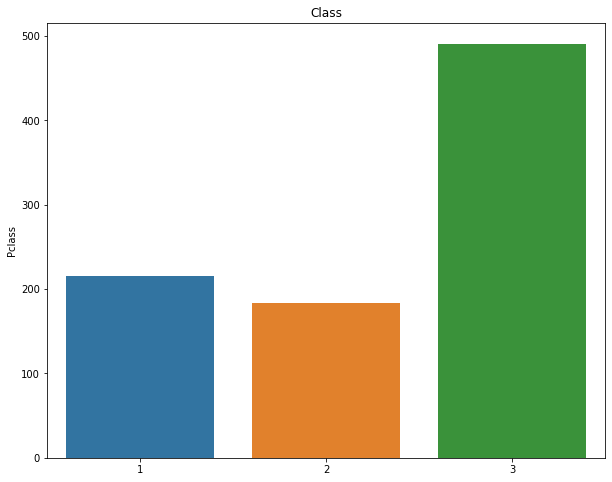

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Class")
sns.barplot(x=main_df['Pclass'].value_counts().index, y=main_df['Pclass'].value_counts())

The number of people from the 3rd grade is more than 2 times higher than the 1st and 2nd grades.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


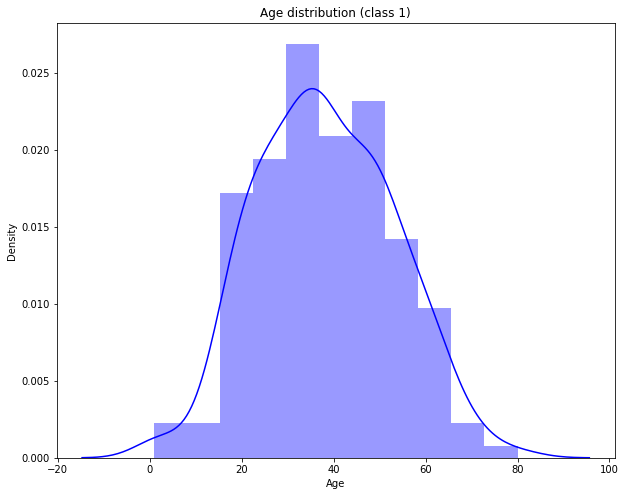

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Age distribution (class 1)")
sns.distplot(main_df[main_df['Pclass'] == 1]['Age'], color="blue")

In [ ]:
main_df[main_df['Pclass'] == 1]['Age'].describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

The age (class 1) distribution density is close to normal. Average age is about 37 years. Minimum 11 months and the oldest 80 years old

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


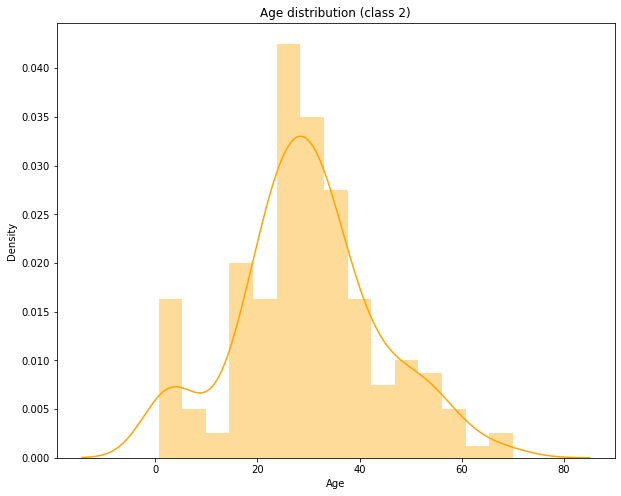

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Age distribution (class 2)")
sns.distplot(main_df[main_df['Pclass'] == 2]['Age'], color="orange")

In [ ]:
main_df[main_df['Pclass'] == 2]['Age'].describe()

count    173.000000
mean      29.877630
std       14.001077
min        0.670000
25%       23.000000
50%       29.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64

The age (class 2) distribution density is close to normal. Average age is about 29 years. Minimum 7 months and the oldest 70 years old

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


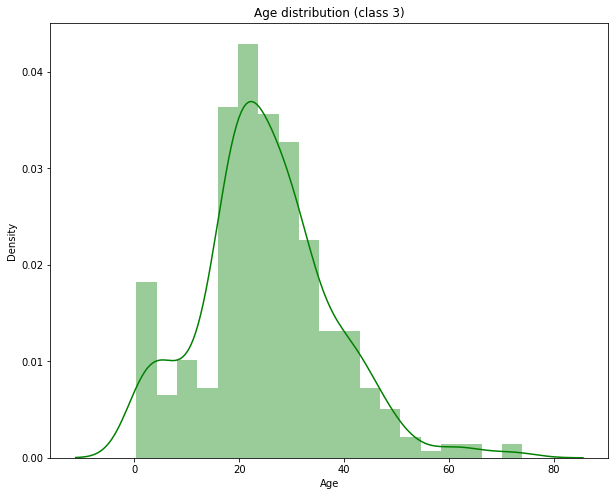

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Age distribution (class 3)")
sns.distplot(main_df[main_df['Pclass'] == 3]['Age'], color="green")

In [ ]:
main_df[main_df['Pclass'] == 3]['Age'].describe()

count    355.000000
mean      25.140620
std       12.495398
min        0.420000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64

The age (class 2) distribution density is close to normal. Average age is about 25 years. Minimum 4 months and the oldest 74 years old

<Figure size 1080x720 with 0 Axes>

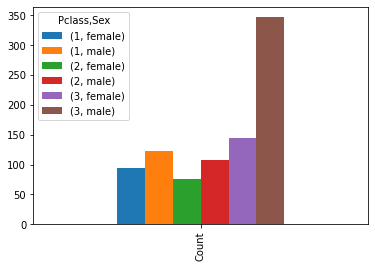

In [ ]:
df = main_df
plt.figure(figsize=(15, 10))
df2 = df.groupby(['Pclass','Sex']).size().reset_index(name='Count')
df3 = pd.pivot_table(df2,  values='Count',  columns=['Pclass', 'Sex'], aggfunc=np.sum,  fill_value=0)
df3.plot(kind="bar")
plt.show()

More people in class 3, where gender is male

The average age is not equal, as can be shown in the graphs. Grade 1 is closer to 37, and grades 2 and 3 are close to each other. You can joke that rich people are older

<Figure size 1280x800 with 0 Axes>

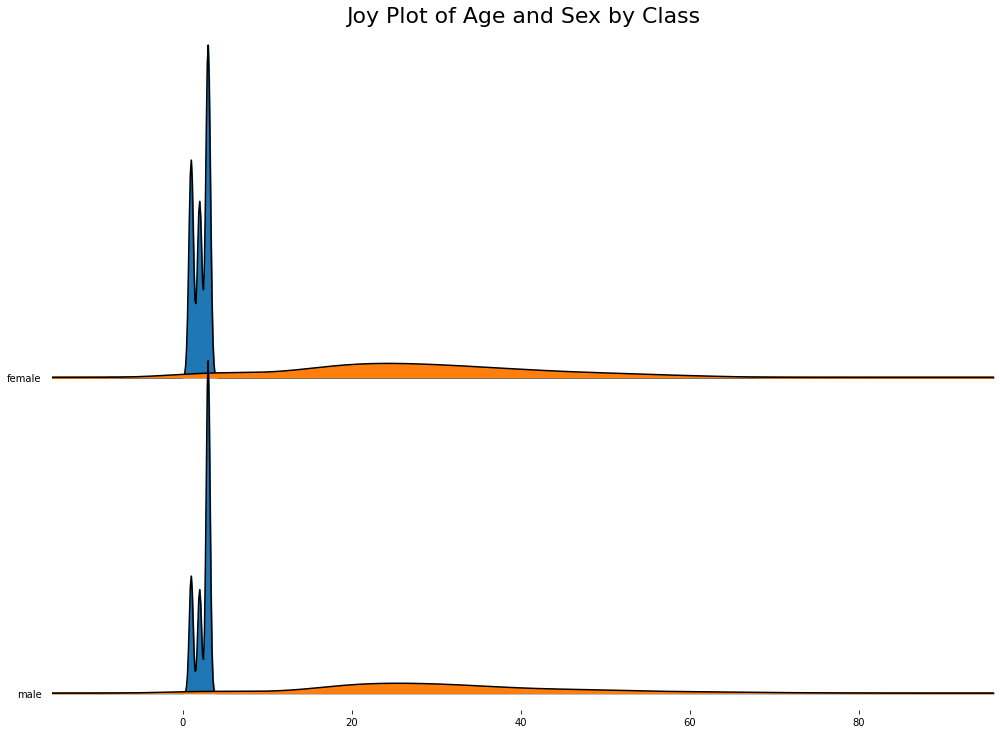

In [ ]:
# Draw Plot
!pip install joypy
import joypy
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(main_df, column=['Pclass', 'Age'], by="Sex", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of Age and Sex by Class', fontsize=22)
plt.show()

In [ ]:
from scipy import stats
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
main_df_new = pd.DataFrame(my_imputer.fit_transform(main_df[['Age', 'Pclass']]))

# Imputation removed column names; put them back
main_df_new.columns = main_df[['Age', 'Pclass']].columns

print(main_df_new['Age'])
main_df['Age'] = main_df_new['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


In [ ]:
stats.ttest_ind(main_df[main_df['Pclass'] == 1]['Age'],main_df[main_df['Pclass'] == 2]['Age'])

Ttest_indResult(statistic=5.17539756047137, pvalue=3.6151399535758465e-07)

In [ ]:
stats.ttest_ind(main_df[main_df['Pclass'] == 1]['Age'],main_df[main_df['Pclass'] == 3]['Age'])

Ttest_indResult(statistic=10.961483349004528, pvalue=6.318417680296215e-26)

In [ ]:
stats.ttest_ind(main_df[main_df['Pclass'] == 3]['Age'],main_df[main_df['Pclass'] == 2]['Age'])

Ttest_indResult(statistic=-3.445458874236269, pvalue=0.000605505253500972)

**What are T-Values and P-values?**

How big is “big enough”? Every t-value has a p-value to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. Low p-values are good; They indicate your data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.

**Task 3. [2 points]**

Use plt.subplots to create side-by-side histograms of distributions:



*   columns: 3 classes
*   rows: age, fare, sex, survival rate

The output is 4 by 3 table.


In [ ]:
columns = main_df['Pclass'].unique()
columns

array([3, 1, 2])

In [ ]:
main_df.head()

,Unnamed: 0_x,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 0_y,Survived
0,NaN,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,0
1,NaN,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,1
2,NaN,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1
3,NaN,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,1
4,NaN,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,0


In [ ]:
df = main_df.groupby(['Pclass']).agg({'Age':'mean', 'Sex':'count', 'Fare':'mean', 'Survived':'count'})[['Age', 'Sex', 'Fare', 'Survived']].reset_index()
df

,Pclass,Age,Sex,Fare,Survived
0,1,37.048118,216,84.154687,216
1,2,29.866958,184,20.662183,184
2,3,26.403259,491,13.675550,491


**Task 4. [1 point]**

Find 5 most common surnames in passenger list. Try to use pandas.Series.apply and lambda-function to extract surnames.

In [ ]:
tmp1 = main_df.groupby(['Name']).size()
tmp1.head(15)

Name
Abbing, Mr. Anthony                               1
Abbott, Mr. Rossmore Edward                       1
Abbott, Mrs. Stanton (Rosa Hunt)                  1
Abelson, Mr. Samuel                               1
Abelson, Mrs. Samuel (Hannah Wizosky)             1
Adahl, Mr. Mauritz Nils Martin                    1
Adams, Mr. John                                   1
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)    1
Aks, Mrs. Sam (Leah Rosen)                        1
Albimona, Mr. Nassef Cassem                       1
Alexander, Mr. William                            1
Alhomaki, Mr. Ilmari Rudolf                       1
Ali, Mr. Ahmed                                    1
Ali, Mr. William                                  1
Allen, Miss. Elisabeth Walton                     1
dtype: int64

In [ ]:
main_df['Sur_Name']=main_df['Name'].apply(lambda x: str(x).split(',')[0])
main_df.head(15)

,Unnamed: 0_x,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 0_y,Survived,Sur_Name
0,NaN,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,NaN,0,Braund
1,NaN,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,NaN,1,Cumings
2,NaN,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1,Heikkinen
3,NaN,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,NaN,1,Futrelle
4,NaN,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,NaN,0,Allen
5,NaN,6,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,NaN,0,Moran
6,NaN,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,NaN,0,McCarthy
7,NaN,8,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,NaN,0,Palsson
8,NaN,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,NaN,1,Johnson
9,NaN,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,NaN,1,Nasser


In [ ]:
tmp1 = main_df.groupby(['Sur_Name']).size().sort_values(ascending=False)
tmp1.head(5)

Sur_Name
Andersson    9
Sage         7
Skoog        6
Johnson      6
Panula       6
dtype: int64

**Task 5. [2 points]**

Probably you already have noticed that there are missing values in the dataset. We will try to fix that.



1.   Omit all the rows, that contain missing values. Is the result plausible? How does this method effect amount of data and values from Task 1 (age histograms, survival rates, etc.?)
2.   Suggest some better options to handle missing values in the data and check if it distorts the statistics.



In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
main_df_new = pd.DataFrame(my_imputer.fit_transform(main_df[['Age', 'Pclass']]))

# Imputation removed column names; put them back
main_df_new.columns = main_df[['Age', 'Pclass']].columns

print(main_df_new['Age'])
main_df['Age'] = main_df_new['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


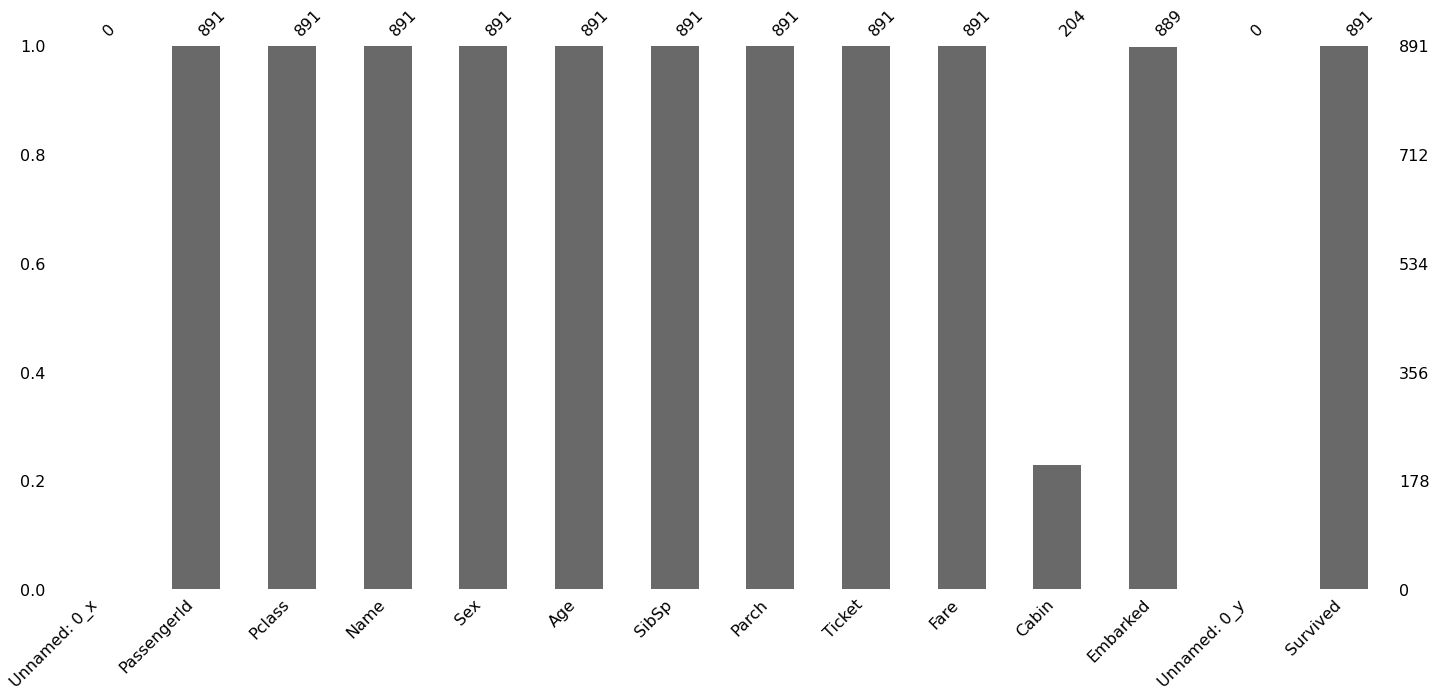

In [ ]:
import missingno as msno
#Visualizing missing values in a dataframe main_df
msno.bar(main_df)

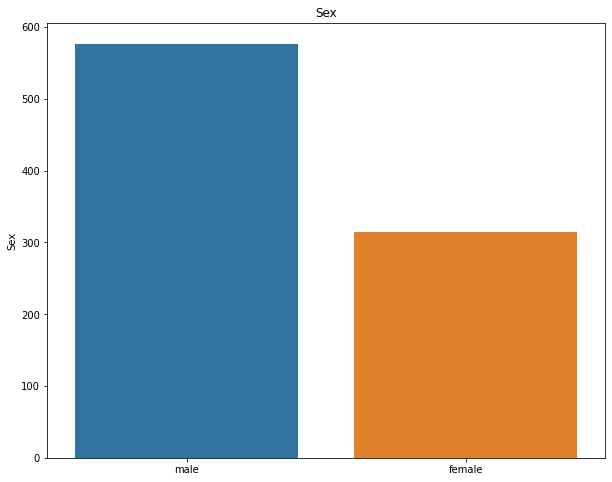

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Sex")
sns.barplot(x=main_df['Sex'].value_counts().index, y=main_df['Sex'].value_counts())

The number of men on board is almost double that of women

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


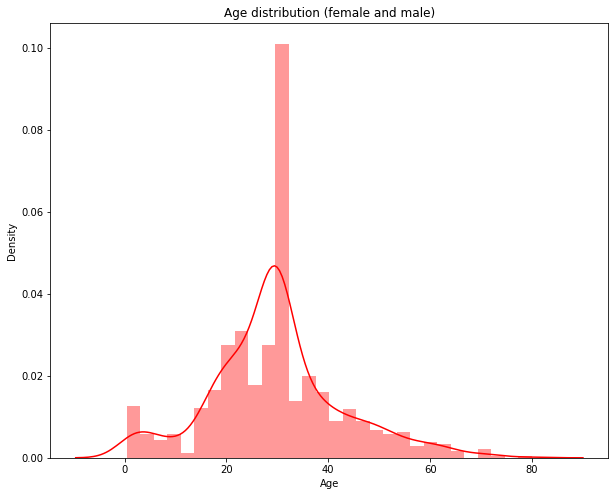

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Age distribution (female and male)")
sns.distplot(main_df['Age'], color="red")

In [ ]:
main_df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

The age (male and female) distribution density is close to normal. Average age is about 29 years. Minimum 4 months and the oldest 80 years old

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


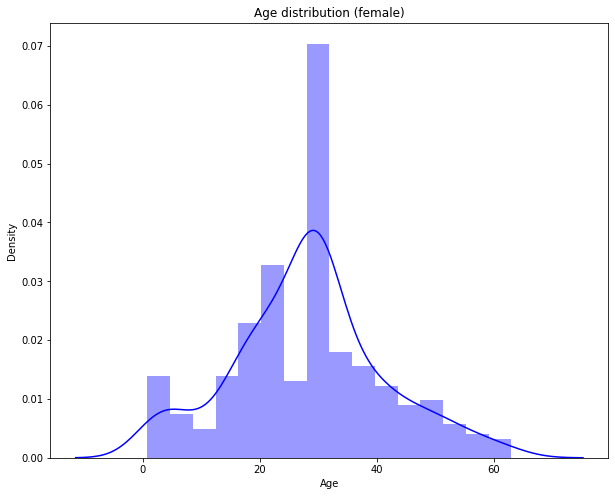

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Age distribution (female)")
sns.distplot(main_df[main_df['Sex'] == 'female']['Age'], color="blue")

In [ ]:
main_df[main_df['Sex'] == 'female']['Age'].describe()

count    314.000000
mean      28.216730
std       12.877543
min        0.750000
25%       21.000000
50%       29.699118
75%       35.000000
max       63.000000
Name: Age, dtype: float64

The age (female) distribution density is close to normal. Average age is about 27 years. Minimum 9 months and the oldest 63 years old

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


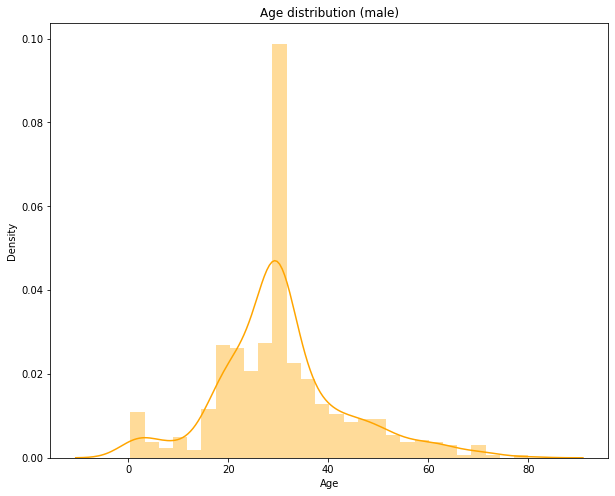

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Age distribution (male)")
sns.distplot(main_df[main_df['Sex'] == 'male']['Age'], color="orange")

In [ ]:
main_df[main_df['Sex'] == 'male']['Age'].describe()

count    577.000000
mean      30.505824
std       13.009478
min        0.420000
25%       23.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

The age (male) distribution density is close to normal. Average age is about 30 years. Minimum 4 months and the oldest 80 years old